# Benchmark Code for Convolutional Neural Networks  
Accuracy and running time of Convolutional Neural Networks with Max-Pooling layers will be benchmarked here.  

## The Data  
CIFAR-10 dataset is used and is downloaded using the Keras library.  

In [1]:
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [2]:
from keras.utils import np_utils
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [3]:
print X_train.shape
print X_test.shape
print y_train.shape
print y_test.shape
print Y_train.shape
print Y_test.shape

(50000, 3, 32, 32)
(10000, 3, 32, 32)
(50000, 1)
(10000, 1)
(50000, 10)
(10000, 10)


In [4]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

## The Model  
We use a 'typical' CNN with Max-Pooling layers to predict classes in CIFAR-10 dataset.  

In [5]:
from keras.models import Sequential
from keras.layers.core import Dense, Flatten, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D

Using Theano backend.
Couldn't import dot_parser, loading of dot files will not be possible.


Optionally, install [Hualos](https://github.com/fchollet/hualos) and use it to visualize the loss function live.  

In [6]:
from keras import callbacks
remote = callbacks.RemoteMonitor(root='http://localhost:9000')

In [7]:
model = Sequential()
model.add(Convolution2D(10, 5, 5, activation='relu', input_shape=(3,32,32)))
model.add(Convolution2D(10, 5, 5, activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.5))
model.add(Convolution2D(10, 5, 5, activation='relu'))
model.add(Convolution2D(10, 5, 5, activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='sgd')

In [8]:
model.fit(X_train[], Y_train[], nb_epoch=20, batch_size=32, verbose=1, show_accuracy=True, callbacks=[remote])

Epoch 1/20
100/100 [==============================] - 0s - loss: 2.3006 - acc: 0.1400     
Epoch 2/20
100/100 [==============================] - 0s - loss: 2.2914 - acc: 0.1300     
Epoch 3/20
100/100 [==============================] - 0s - loss: 2.3423 - acc: 0.0800     
Epoch 4/20
100/100 [==============================] - 0s - loss: 2.3554 - acc: 0.0500     
Epoch 5/20
100/100 [==============================] - 0s - loss: 2.3081 - acc: 0.1200     
Epoch 6/20
100/100 [==============================] - 0s - loss: 2.3136 - acc: 0.0900     
Epoch 7/20
100/100 [==============================] - 0s - loss: 2.3110 - acc: 0.1300     
Epoch 8/20
100/100 [==============================] - 0s - loss: 2.3047 - acc: 0.1300     
Epoch 9/20
100/100 [==============================] - 0s - loss: 2.2950 - acc: 0.1300     
Epoch 10/20
100/100 [==============================] - 0s - loss: 2.3194 - acc: 0.1100     
Epoch 11/20
100/100 [==============================] - 0s - loss: 2.2784 - acc: 0.1500   

## The Layers  
In order to visualize the trained layers:  
1. Recreate the CNN model up until the layer you want to visualize.  
2. Copy weights from the trained model to the new model.  
3. Then use `predict` to transform an input image to the output at the desired layer.  
4. Plot the output image.  

In [9]:
model2 = Sequential()
model2.add(Convolution2D(10, 5, 5, activation='relu', input_shape=(3,32,32), weights=model.layers[0].get_weights()))
model2.add(Convolution2D(10, 5, 5, activation='relu', weights=model.layers[1].get_weights()))
model2.add(MaxPooling2D())
model2.compile(loss='categorical_crossentropy', optimizer='sgd')

In [10]:
out = model2.predict(X_train[0:5])

In [11]:
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib.cm as cm

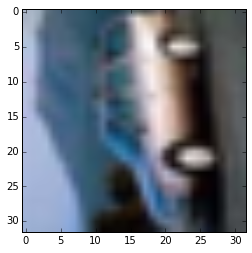

In [12]:
plt.imshow(X_train[4].T)

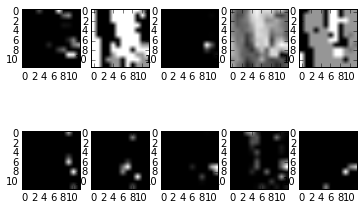

In [13]:
for i, image in enumerate(out[4]):
    plt.subplot(2, 5, i+1)
    plt.imshow(image.T, cmap=cm.Greys_r)